# Stanton Murillo Transport Validation

[1] "Ionic transport in high-energy-density matter"  [10.1103/PhysRevE.93.043203](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.93.043203)

[2]"Efficient model for electronic transport in high energy-density matter "  [https://doi.org/10.1063/5.0048162](https://doi.org/10.1063/5.0048162)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

import SMT.core.transport as SMT
from SMT.core.physical_constants import *
from SMT.core.physical_parameters import rs_from_n

In [2]:
N_ions = 1
Z, A = 13, 26.98
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
# ρi_gpercc  = 1
ni_array_cc = np.array([6.02660153e+22])#np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )

print(f"For Z={Z}, A={A}, T={T_array_AU[0]*AU_to_eV:0.3e} [eV], n = {ni_array_cc[0]:0.3e} [1/cc]: ")
print(f"Zbar={smt.Zbar_array[0]:0.3e}, λeff = {smt.λeff*AU_to_cm:0.3e} [cm]")

print(f"[[gee, gei],[gie,gii]] = {smt.g_matrix} ")
print(f"K_11(gij) = {smt.K_11_matrix}")
print(f"K_12(gij) = {smt.K_12_matrix}")
print(f"K_22(gij) = {smt.K_22_matrix}")
print(f"K_13(gij) = {smt.K_13_matrix}")
print(f"Dij = {smt.Dij*AU_to_cm**2/AU_to_s} [cm^2/s]")
print(f"σ = {smt.σ * AU_to_Siemens/AU_to_cm:0.3e} [S/cm]")
print(f"κ = {smt.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K):0.3e} [erg/cm/s/K]")


For Z=13, A=26.98, T=1.000e+00 [eV], n = 6.027e+22 [1/cc]: 
Zbar=2.496e+00, λeff = 4.829e-09 [cm]
[[gee, gei],[gie,gii]] = [[ 29.82189249  74.43998336]
 [ 74.43998336 185.81353031]] 
K_11(gij) = [[0.0026703  0.00071444]
 [0.00071444 0.00017552]]
K_12(gij) = [[0.00623664 0.00175556]
 [0.00175556 0.00044646]]
K_22(gij) = [[0.00702937 0.00185186]
 [0.00185186 0.00044746]]
K_13(gij) = [[0.02059276 0.00603612]
 [0.00603612 0.00157653]]
Dij = [[0.38028577 0.16130628]
 [0.16130628 0.00067197]] [cm^2/s]
σ = 1.359e+04 [S/cm]


AttributeError: 'TransportProperties' object has no attribute 'κi'

FROM LUKE:

For Z=13, A=26.98, T=1.000e+00 [eV], n = 6.027e+22 [1/cc]: 
Zbar=2.496e+00, λeff = 3.353e-02 [cm]
gii = [185.81354848] 
K_11(gii) = [0.00017552]
K_12(gii) = [0.00044746]
K_22(gii) = [0.00044746]
K_13(gii) = [0.00157653]
Dij = 2.349e-03 [cm^2/s]
κ = 4.792e+04 [erg/cm/s/K]

In [ ]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
ρi_gpercc  = 1
ni_array_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )


print(f"For Z={Z}, A={A}, T={T_array_AU[0]*AU_to_eV:0.3e} [eV], n = {ni_array_cc[0]:0.3e} [1/cc]: ")
print(f"Zbar={smt.Zbar_array[0]:0.3e}, λeff = {smt.λeff*AU_to_cm:0.3e} [cm]")

print(f"[[gee, gei],[gie,gii]] = {smt.g_matrix} ")
print(f"K_11(gij) = {smt.K_11_matrix}")
print(f"K_12(gij) = {smt.K_12_matrix}")
print(f"K_22(gij) = {smt.K_22_matrix}")
print(f"K_13(gij) = {smt.K_13_matrix}")
print(f"Dij = {smt.Dij*AU_to_cm**2/AU_to_s} [cm^2/s]")
print(f"σ = {smt.σ * AU_to_Siemens/AU_to_cm:0.3e} [S/cm]")
print(f"κ = {smt.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K):0.3e} [erg/cm/s/K]")

In [ ]:
T_AU_list = np.geomspace(1e-1,1e4,num=100)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κ_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    smt.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = smt.σ * AU_to_Siemens/AU_to_cm
    κ_list_cgs[i] = smt.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = smt.Dij[1,1] *AU_to_cm**2/AU_to_s
    # print(25*smt.K_11_matrix[0,1:] - 20*smt.K_12_matrix[0,1:] + 4*smt.K_13_matrix[0,1:]," = ", 25*smt.K_11_matrix[0,1:], - 20*smt.K_12_matrix[0,1:], 4*smt.K_13_matrix[0,1:])
    print(f"g: {smt.g_matrix}")
    print("denom: ", 25*smt.K_11_matrix - 20*smt.K_12_matrix + 4*smt.K_13_matrix, '\n')#," = \n", 25*smt.K_11_matrix, - 20*smt.K_12_matrix, 4*smt.K_13_matrix)


## $K_{nm}$

In [3]:
K11_data = read_csv("K_11(g).txt", delim_whitespace=True, header=1)

(array(0.21901579), array(0.12091229))

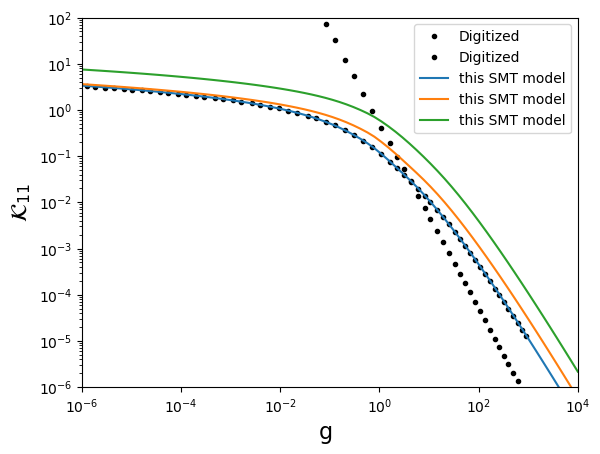

In [14]:
from SMT.core.transport import K_nm

fig, ax = plt.subplots( facecolor='white')

#Plot iSMT digitized
ax.plot(K11_data['g'], K11_data['K_11(g)'],'k.', label="Digitized")
ax.plot(K11_data['g'], 0.5/K11_data['g']**2,'k.', label="Digitized")

#
g_array = np.geomspace(1e-10,1e4,num=100)
ax.plot(g_array,[K_nm(g,1,1) for g in g_array], label='this SMT model')
ax.plot(g_array,[K_nm(g,1,2) for g in g_array], label='this SMT model')
ax.plot(g_array,[K_nm(g,1,3) for g in g_array], label='this SMT model')

ax.set_xlabel(r"g ", fontsize=16)
ax.set_ylabel(r"$\mathcal{K}_{11}$", fontsize=16)

# Inset Text Box
# bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=smt)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-6,1e2)
ax.set_xlim(1e-6,1e4)
# Legend
ax.legend()

K_nm(1,1,2), K_nm(1,1,1) 


## Electrical Conductivity

First, loading data from [2]

In [ ]:
σ_data_e1b = read_csv("Fig1b_eSMT_σ.txt", delim_whitespace=True, header=1)

In [ ]:
T_AU_list = np.geomspace(1e-1,1e4,num=100)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κ_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    smt.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = smt.σ * AU_to_Siemens/AU_to_cm
    κ_list_cgs[i] = smt.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = smt.Dij[1,1] *AU_to_cm**2/AU_to_s
    # print(25*smt.K_11_matrix[0,1:] - 20*smt.K_12_matrix[0,1:] + 4*smt.K_13_matrix[0,1:]," = ", 25*smt.K_11_matrix[0,1:], - 20*smt.K_12_matrix[0,1:], 4*smt.K_13_matrix[0,1:])
    # print(f"g: {smt.g_matrix}")
    # print("denom: ", 25*smt.K_11_matrix - 20*smt.K_12_matrix + 4*smt.K_13_matrix, '\n')#," = \n", 25*smt.K_11_matrix, - 20*smt.K_12_matrix, 4*smt.K_13_matrix)


In [ ]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(σ_data_e1b['T[eV]'], σ_data_e1b['σ[S/cm]'],'k-', label="eSMT data")

#
ax.plot(T_AU_list*AU_to_eV, σ_list_cgs, label='SMT')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=smt)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()



## Thermal Conductivity

#### SMT

In [ ]:
κ_data_e3b = read_csv("Fig3b_eSMT_κ.txt", delim_whitespace=True, header=1)

In [ ]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(κ_data_e3b['T[eV]'], κ_data_e3b['κ[erg/cm/s/K]'],'k-', label="eSMT data")

#
ax.plot(T_AU_list*AU_to_eV, κ_list_cgs, label='SMT')

ax.set_ylabel(r"$\kappa$ [erg/cm/s/K]")
ax.set_xlabel(r"$T$ [eV]")

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()


In [ ]:
25*smt.K_11_matrix[1:,1], - 20*smt.K_12_matrix[1:,1], 4*smt.K_13_matrix[1:,1]

#### TCCW2

In [ ]:
N_ions = 1
Z, A = 6, 12
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
ρi_gpercc  = 10
ni_array_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
tccw2_κ_smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )

T_AU_list = np.geomspace(1e-2,2e3,num=50)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κe_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
g_ee_list = np.ones_like(T_AU_list)
λi_list = np.ones_like(T_AU_list)
λe_list = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    tccw2_κ_smt.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = tccw2_κ_smt.σ * AU_to_Siemens/AU_to_cm
    κe_list_cgs[i] = tccw2_κ_smt.κee * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = tccw2_κ_smt.Dij[1,1] *AU_to_cm**2/AU_to_s
    g_ee_list[i] = tccw2_κ_smt.g_matrix[0,0]
    λi_list[i]   = tccw2_κ_smt.λi_array[0]
    λe_list[i]   = tccw2_κ_smt.λe

In [ ]:
κe_data_tccw2_κ = read_csv("Fig7tm_TCCW2_κ.txt", delim_whitespace=True, header=1)
κe_data_tccw2_κ_AA = read_csv("Fig7tm_TCCW2_κ_AA.txt", delim_whitespace=True, header=1)

In [ ]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(κe_data_tccw2_κ['T[eV]'], κe_data_tccw2_κ['κ[erg/cm/s/K]'],'k.', label="TCCW2 digitized SMT")
ax.plot(κe_data_tccw2_κ_AA['T[eV]'], κe_data_tccw2_κ_AA['κ[erg/cm/s/K]'],'b^', label="TCCW2 data - AA")

#
ax.plot(T_AU_list*AU_to_eV, κe_list_cgs, label='my SMT (with g_ee)')

ax.set_ylabel(r"$\kappa$ [erg/cm/s/K]")
ax.set_xlabel(r"$T$ [eV]")

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e5,1e13)
ax.set_xlim(0.5e-1,1e3)

# Legend
ax.legend()


In [ ]:
np.array([T_AU_list*AU_to_eV, σ_list_cgs]).T

In [ ]:
np.array([T_AU_list*AU_to_eV, κe_list_cgs]).T

In [ ]:
25*smt.K_11_matrix[1:,1], - 20*smt.K_12_matrix[1:,1], 4*smt.K_13_matrix[1:,1]

## Diffusion

In [ ]:
fig, ax = plt.subplots( facecolor='white')

ax.plot(T_AU_list*AU_to_eV, D_list_cgs, label='')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=smt)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r"D [cm$^2$/s]", fontsize=16)
ax.set_xlabel(r"$T$ [eV]", fontsize=16)

# Legend
ax.legend()


## Temperature Relaxation
In reference [1], they actually use
$$\tau_{MD} = 2/(\tau_{ei}^{-1} + \tau_{ie}^{-1}) $$
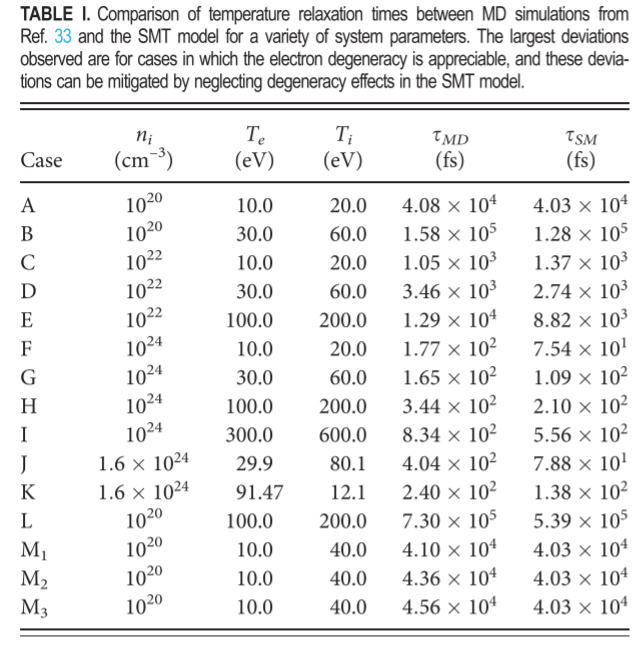


In [ ]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])


In [ ]:
# Case A
T_array_AU = np.array([10*eV_to_AU, 20*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( smt.τij[0,1]**-1 + smt.τij[1,0]**-1)  *AU_to_s*1e15))

In [ ]:
# Case B
T_array_AU = np.array([30*eV_to_AU, 60*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( smt.τij[0,1]**-1 + smt.τij[1,0]**-1)  *AU_to_s*1e15))

In [ ]:
# 